In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read the data

df = pd.read_csv('news.csv')

df.shape

(6335, 4)

In [6]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# extract the necessary feature
X, y = df['text'], df['label']

In [8]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [9]:
# initialize a Tf-Idf Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit and transform the data

tfidf_train = tfidf.fit_transform(X_train) 
tfidf_test = tfidf.transform(X_test)

In [10]:
# initialize a PassiveAgressiveClassifer
pac = PassiveAggressiveClassifier(max_iter=50)

# fit the data
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [11]:
# predict on the test set
y_pred = pac.predict(tfidf_test)

In [12]:
# calculate accuracy

score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.45%


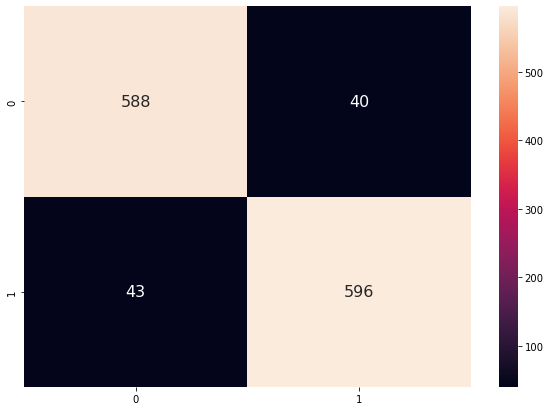

In [13]:
# build confusion matrix

conf_mat = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10, 7))
_ = sns.heatmap(conf_mat, annot=True, annot_kws={'size' : 16}, fmt='d')

In [14]:
sgd_clf = SGDClassifier()
sgd_clf.fit(tfidf_train, y_train)

SGDClassifier()

In [15]:
y_pred = sgd_clf.predict(tfidf_test)

In [16]:
# calculate accuracy

score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.69%


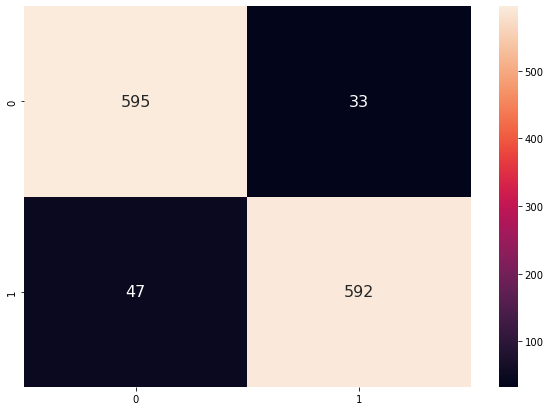

In [17]:
# build confusion matrix

conf_mat = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10, 7))
_ = sns.heatmap(conf_mat, annot=True, annot_kws={'size' : 16}, fmt='d')

In [19]:
rnd_fst = RandomForestClassifier()
rnd_fst.fit(tfidf_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rnd_fst.predict(tfidf_test)

In [22]:
# calculate accuracy

score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 90.29%


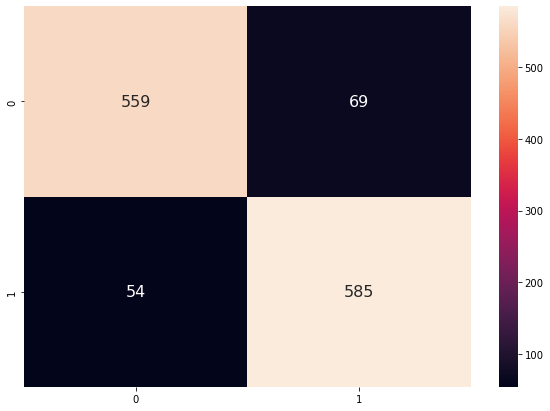

In [23]:
# build confusion matrix

conf_mat = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10, 7))
_ = sns.heatmap(conf_mat, annot=True, annot_kws={'size' : 16}, fmt='d')